<a href="https://colab.research.google.com/github/hari2301/Udemy_100-_Exercises-Python-DataScience/blob/main/Excs(81_90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

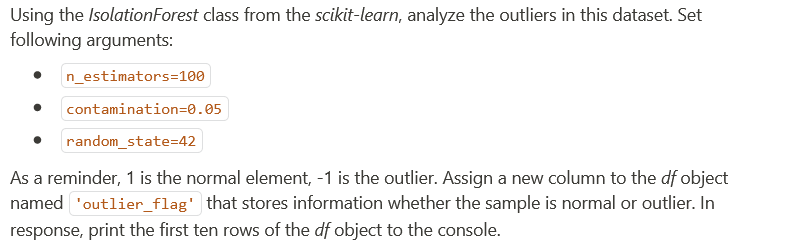

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


np.random.seed(42)
df = pd.read_csv('factory.csv')
isf=IsolationForest(n_estimators=100,contamination=0.05,random_state=42).fit_predict(df)
df['outlier_flag'] = isf
print(df.head(10))

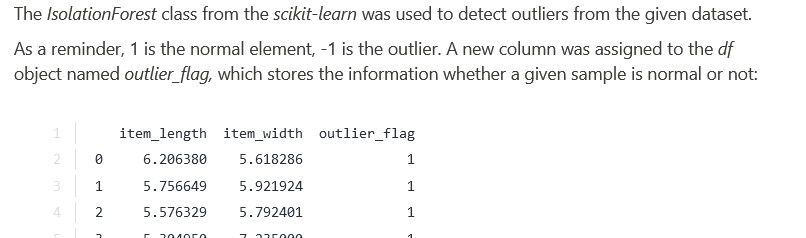

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


np.random.seed(42)
df = pd.read_csv('factory.csv')

outlier = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outlier.fit(df)
df['outlier_flag'] = outlier.predict(df)

print(df['outlier_flag'].value_counts())

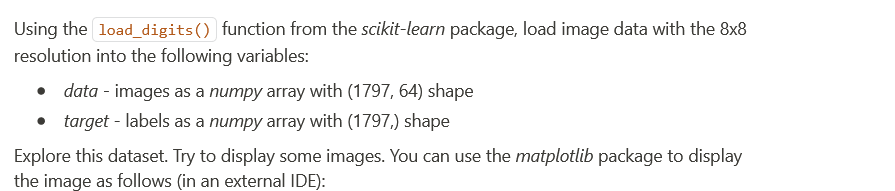

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)
data, target = load_digits(return_X_y=True)

#idx = 250
#plt.imshow(data[idx].reshape(8, 8), cmap='gray_r')
#plt.title(f'Label: {target[idx]}')
#plt.show()

print(target[250])

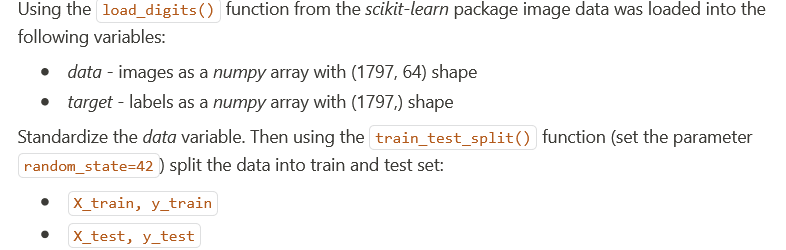

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data=data/data.max()

X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

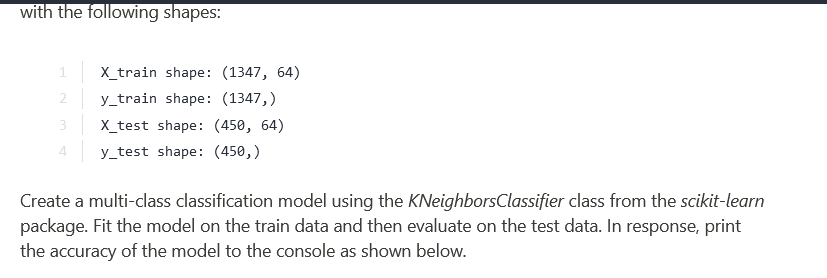

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

knn=KNeighborsClassifier().fit(X_train,y_train)
print(f'KNN accuracy: {knn.score(X_test,y_test):.4f}')


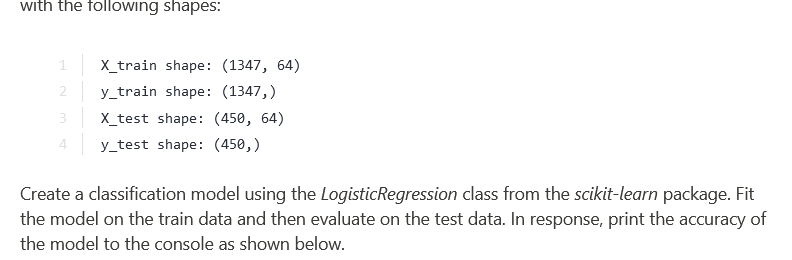

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
data, target = load_digits(return_X_y=True)
data = data / data.max()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
lr=LogisticRegression(max_iter=1000).fit(X_train,y_train)
print(f'LogisticRegression accuracy: {lr.score(X_test,y_test):.4f}')

LogisticRegression accuracy: 0.9689


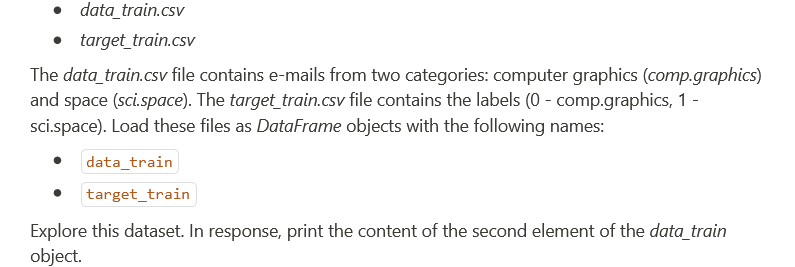

In [ ]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('data_train.csv')
target_train = pd.read_csv('target_train.csv')

print(data_train['text'][1])

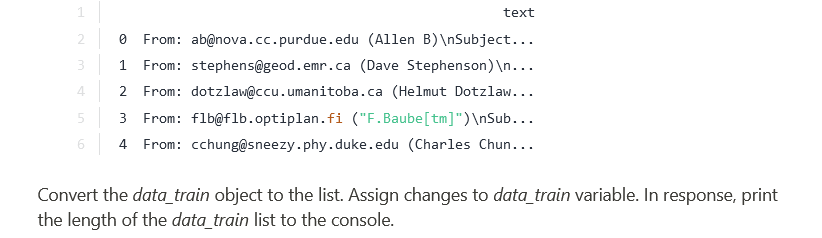

In [ ]:
import numpy as np
import pandas as pd


data_train = pd.read_csv('data_train.csv')
target_train = pd.read_csv('target_train.csv')

data_train = data_train['text'].tolist()
print(len(data_train))

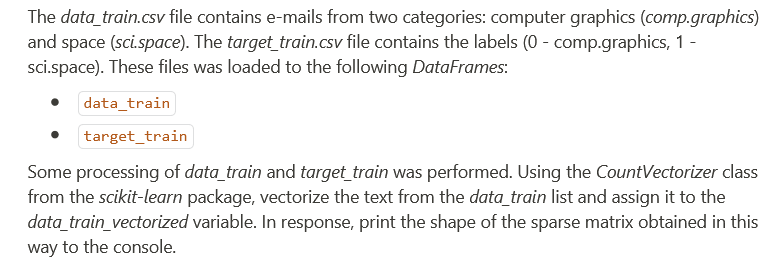

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


data_train = pd.read_csv('data_train.csv')
target_train = pd.read_csv('target_train.csv')

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

cv = CountVectorizer().fit_transform(data_train['text'])
print(cv.shape)

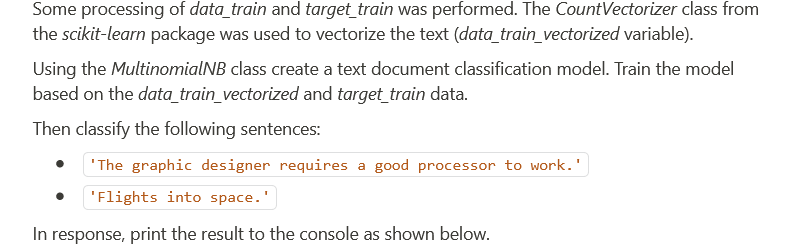

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


data_train = pd.read_csv('data_train.csv')
target_train = pd.read_csv('target_train.csv')

categories = ['comp.graphics', 'sci.space']

data_train = data_train['text'].tolist()
target_train = target_train.values.ravel()

vectorizer = CountVectorizer()
data_train_vectorized = vectorizer.fit_transform(data_train)

nb = MultinomialNB()
model = nb.fit(data_train_vectorized, target_train)

docs=['The graphic designer requires a good processor to work', 'Flights into space']
transform = vectorizer.fit_transform(docs)
doc_pred = model.predict(docs)

for doc, classes in zip(docs, doc_pred):
    print(f'{doc} => {categories[classes]}')